In [94]:
# Importing Packages

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

In [95]:
# Creating Bell pair by a third party

def bell_state(qc, control, target):
    qc.h(control)
    qc.cx(control, target)
    qc.barrier()

In [96]:
# Interaction between Alic qubit and |k> state to be sent to Bob

def interact(qc, q1, q2):
    qc.cx(q1, q2)
    qc.h(q1)
    qc.barrier()

In [97]:
# Measuring Qubits 1 and 2 by Alice to collapse to |k>

def measure1(qc, q1, q2):
    qc.measure(q1, c1)
    qc.measure(q2, c2)
    qc.barrier()

In [98]:
# Bob reconstructs |k> using information he receives from Alice

def bob(qc, q3, c1, c2):
    qc.x(q3).c_if(c1,1)
    qc.z(q3).c_if(c2,1)
    qc.barrier()

In [99]:
# Creating Quantum Circuit

backend = Aer.get_backend('qasm_simulator')
shots = 1024

style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

qreg = QuantumRegister(3, name="q")    
c1 = ClassicalRegister(1, name="c1") 
c2 = ClassicalRegister(1, name="c2") 
c3 = ClassicalRegister(1, name="c3") 
qc = QuantumCircuit(qreg, c1, c2, c3)

<IPython.core.display.Latex object>

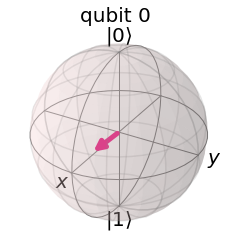

In [100]:
# Creating |k> state in case of "Simulated Statevector"

# def generate_k(qc, q1, c3):
# Create random 1-qubit state
q1 = random_statevector(2)

init_gate = Initialize(q1)
init_gate.label = "init"
qc.append(init_gate, [0])

# Display it nicely
display(array_to_latex(q1, prefix="|k\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(q1)



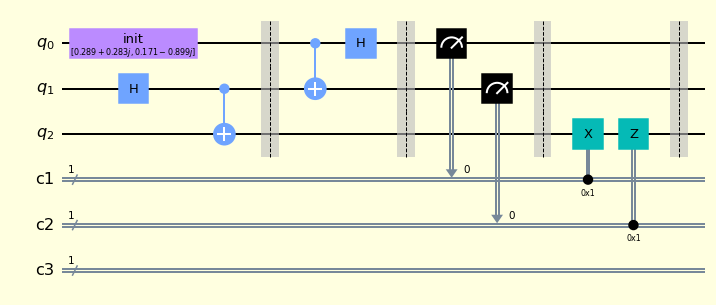

In [101]:
bell_state(qc, 1, 2)
interact(qc, 0, 1)
measure1(qc, 0, 1)
bob(qc, 2, c1, c2)
qc.draw(output="mpl", style=style)

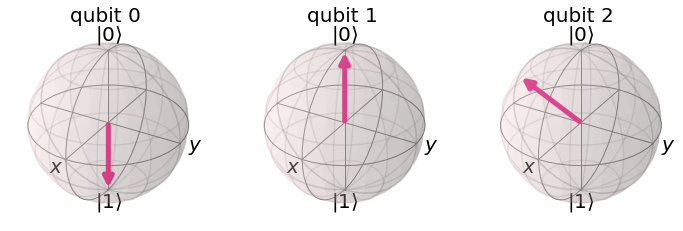

In [102]:
# transpiled_dj_circuit = transpile(qc, backend)
# qobj = assemble(transpiled_dj_circuit)
# results = backend.run(qobj).result()
# answer = results.get_counts()
# plot_histogram(answer)

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

# References
[Random Statevector - Source Code](https://qiskit.org/documentation/_modules/qiskit/quantum_info/states/random.html#random_statevector)

[Quantum Teleportation by Qiskit](https://qiskit.org/textbook/ch-algorithms/teleportation.html#3.-Simulating-the-Teleportation-Protocol-)

[Teach me Quantum - 2018](https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_quantum_2018/intro2qc/7.Quantum%20teleportation.ipynb)

[Edwin Agnew](https://medium.com/swlh/quantum-teleportation-from-scratch-to-magic-part-2-doing-it-on-a-real-device-25be7386a158)